<img src="http://drive.google.com/uc?export=view&id=1tpOCamr9aWz817atPnyXus8w5gJ3mIts" width=500px>

Proprietary content. © Great Learning. All Rights Reserved. Unauthorized use or distribution prohibited.

## Problem Statement



# Samsung Internal SSD Reviews prediction

Rating predictions using reviews written by users can be a useful problem statement in E-commerce domain and can be used for recommending similar products that may interest users. The dataset in this problem statement comprises reviews pertaining to Samsung Internal SSD product specifically SAMSUNG 850 EVO 2.5" 250GB SATA III 3D NAND Internal Solid State Drive (SSD) MZ-75E250B/AM from the NewEgg Store website.  We will build a Natural Language processing model using Glove embeddings which is trained on reviews given by customers that have used the product and try to predict ratings given a new rating.




### Objective:
Given the reviews provided by customers, can you train a model that accurately predicts the corresponding rating of a review?

### Package version

- tensorflow==2.3.0
- scikit-learn==0.22.2.post1
- pandas==1.0.5
- numpy==1.18.5
- matplotlib==3.2.2
- google==2.0.3

### Data Dictionary 

- review_title : The Title for the customer review

- overall_review: The whole customer review details

- pros: The customer opinion about the good things in this product

- cons: The customer opinion about the bad things in this product

- ownership_pariod: How long the customer owned this product

- date: When the review was written

- rating_stars: The product rating from 1 to 5

- year: In which year the review was written

- month: In which month the review was written

- day: In which day the review was written

## Table of Content

1. Import Libraries

2. Setting options

3. Read Data

4. Data Analysis and Preparation

5. Model Building

6. Conclusion and Interpretation

7. Food for thought

## 1. Import Libraries

Let us start by mounting the drive

In [12]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Let us check for the version of installed tensorflow.

In [70]:
# used to supress display of warnings
import warnings

# os is used to provide a way of using operating system dependent functionality
# We use it for setting working folder
import os

# Pandas is used for data manipulation and analysis
import pandas as pd 

# Numpy is used for large, multi-dimensional arrays and matrices, along with mathematical operators on these arrays
import numpy as np

# Matplotlib is a data visualization library for 2D plots of arrays, built on NumPy arrays 
# and designed to work with the broader SciPy stack
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import pyplot

# Seaborn is based on matplotlib, which aids in drawing attractive and informative statistical graphics.
import seaborn as sns
import tensorflow as tf
print(tensorflow.__version__)

2.5.0


## 2. Setting Options

In [19]:
# suppress display of warnings
warnings.filterwarnings('ignore')

# display all dataframe columns
pd.options.display.max_columns = None

# to set the limit to 3 decimals
pd.options.display.float_format = '{:.7f}'.format

# display all dataframe rows
pd.options.display.max_rows = None

pd.set_option("display.max_colwidth",-1)

## 3. Read Data

### Read the dataset and check top 5 rows

In [43]:
path = "/content/drive/MyDrive/Colab Notebooks/Data/"
ssd_review_df = pd.read_csv(path + "ssd_reviews.csv")

In [45]:
ssd_review_df.head()

,Unnamed: 0,review_title,overall_review,pros,cons,ownership_pariod,date,rating_stars,year,month,day
0,0,solid,buy it you will not regret this purchase,reliable fast silent cool running drive highly recommend,NaN,years,2019-12-05 12:58:58,5,2019,12,5
1,1,nice drive for price even cheaper by todays costs,good drive price,been running almost constantly since when i purchased it 24x7x365 with random power outages no issues to date with it will buy samsung evo s in future builds,NaN,years,2019-11-01 08:25:45,5,2019,11,1
2,2,perfect,used this drive as my boot drive and only data storage on my previous build and now 4 years later i m using it as my new rig s game library crystaldisk still shows it at 100 and it s still plenty fast vs the new 860 evo can t go wrong with this one,good value decently fast good longevity,none so far,years,2019-10-27 17:05:49,5,2019,10,27
3,3,very snappy,os boots quicker os menus pop up quicker gaming load screens go quicker,noticeable improvement in os performance over a spinning drive,samsung magician software causes some games to fail to launch if you leave it running in the background,years,2019-10-24 18:29:43,5,2019,10,24
4,4,worth the hype,this was the sdd that everyone said to get and it has yet to disappoint it is super speedy and has given me no troubles,NaN,NaN,years,2019-09-11 19:21:03,5,2019,9,11


### Check info of the dataset and write your findings

In [15]:
ssd_review_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2227 entries, 0 to 2226
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        2227 non-null   int64 
 1   review_title      2131 non-null   object
 2   overall_review    1448 non-null   object
 3   pros              2205 non-null   object
 4   cons              2216 non-null   object
 5   ownership_pariod  2159 non-null   object
 6   date              2227 non-null   object
 7   rating_stars      2227 non-null   int64 
 8   year              2227 non-null   int64 
 9   month             2227 non-null   int64 
 10  day               2227 non-null   int64 
dtypes: int64(5), object(6)
memory usage: 191.5+ KB


The dataset has 11 columns, first column is an additional index which is not relevant, there are 5 columns having integer values

In [22]:
ssd_review_df.shape

(2227, 11)

## 4.  Data Analysis and Preparation

### 4.1 Checking missing values
#### Check for missing values (along with the percentage of null values)

In [23]:
ssd_review_df.isnull().sum()

Unnamed: 0          0  
review_title        96 
overall_review      779
pros                22 
cons                11 
ownership_pariod    68 
date                0  
rating_stars        0  
year                0  
month               0  
day                 0  
dtype: int64

In [26]:
len(ssd_review_df)

2227

In [25]:
ssd_review_df.isna().sum() * 100 / len(ssd_review_df)

Unnamed: 0         0.0000000 
review_title       4.3107319 
overall_review     34.9797934
pros               0.9878761 
cons               0.4939380 
ownership_pariod   3.0534351 
date               0.0000000 
rating_stars       0.0000000 
year               0.0000000 
month              0.0000000 
day                0.0000000 
dtype: float64

### 4.2 Analyzing the target column (Rating_stars)

#### Check the value counts of 'rating_stars' and write your comments

In [27]:
ssd_review_df['rating_stars'].value_counts()

5    1756
4    181 
1    153 
3    77  
2    60  
Name: rating_stars, dtype: int64

There are 1756 rows with rating value as 5. So the data is highly imbalanced towards the 5 rating.

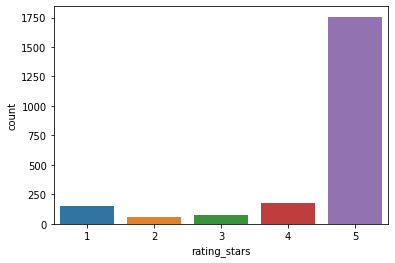

In [28]:
import seaborn as sns
sns.countplot(ssd_review_df.rating_stars)

### 4.3 Let's analyze other features like year, month, and day etc.
#### Check value counts of 'year' and write your observations., Comment on the range of years, frequency of ratings in each year.

In [31]:
ssd_review_df["year"].value_counts()

2015    1006
2016    605 
2017    370 
2018    187 
2019    46  
2014    13  
Name: year, dtype: int64

The popularity of the SSD model has been decreasing since 2015, when it was at its peak, as the number of reviews are decreasing

#### Check mean rating for each year and write your findings

In [30]:
ssd_review_df.groupby(['year']).rating_stars.mean()

year
2014   4.9230769
2015   4.4582505
2016   4.5900826
2017   4.5108108
2018   4.3475936
2019   4.3478261
Name: rating_stars, dtype: float64

The mean rating was best in 2016 and there is no major variation in the mean rating between 2014 and 2019

In [32]:
pd.crosstab(ssd_review_df.year,ssd_review_df.rating_stars)

rating_stars,1,2,3,4,5
year,,,,,
2014,0,0,0,1,12
2015,65,31,45,102,763
2016,37,10,17,36,505
2017,25,13,8,26,298
2018,22,4,5,12,144
2019,4,2,2,4,34


#### Check value counts of 'month' and write your observations. Comment on the frequency of ratings and discuss if the rating count and mean rating is higher/low on certain months.

In [34]:
ssd_review_df["month"].value_counts()

12    278
2     239
3     234
1     221
4     205
11    191
5     158
9     157
7     144
10    141
6     140
8     119
Name: month, dtype: int64

The number of reviews are least in Aug and the most in Dec, which depicts the probable seasonality in buying pattern, during Christmas holidays.

In [35]:
ssd_review_df.groupby(['month']).rating_stars.mean()

month
1    4.6425339
2    4.4058577
3    4.6111111
4    4.4195122
5    4.4493671
6    4.5571429
7    4.7638889
8    4.4789916
9    4.5414013
10   4.3049645
11   4.4607330
12   4.3597122
Name: rating_stars, dtype: float64

The mean values of the number of reviews do not show any major variation, when compared month on month

### 4.4 Combine text features
#### Drop all the numerical features ['Unnamed: 0','date', 'year', 'month', 'day', 'ownership_pariod'] and ['rating_stars']

In [47]:
ssd_review_df.drop(columns=['Unnamed: 0','date','year','month','day','ownership_pariod'],axis=1, inplace=True)

In [48]:
ssd_review_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2227 entries, 0 to 2226
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   review_title    2131 non-null   object
 1   overall_review  1448 non-null   object
 2   pros            2205 non-null   object
 3   cons            2216 non-null   object
 4   rating_stars    2227 non-null   int64 
dtypes: int64(1), object(4)
memory usage: 87.1+ KB


#### Replace null values (NaN) with blanks

In [49]:
ssd_review_df.fillna("", inplace=True)

In [50]:
ssd_review_df.isnull().sum()

review_title      0
overall_review    0
pros              0
cons              0
rating_stars      0
dtype: int64

#### Join all text items in a row that have a space in between and Add a new column (with the newly created combined reviews) to the dataframe.

In [52]:
ratings_df = pd.DataFrame(ssd_review_df['rating_stars'])
ssd_review_df.drop(columns='rating_stars', axis=1, inplace=True)

In [55]:
ssd_review_df['combined_reviews'] = ssd_review_df[ssd_review_df.columns].apply(lambda x: ' '.join(x),axis=1)

In [58]:
ssd_review_df.drop(columns=['review_title','overall_review','pros','cons'], axis=1,inplace=True)

In [60]:
ssd_review_df['rating_stars'] = ratings_df['rating_stars']

In [61]:
ssd_review_df.head()

,combined_reviews,rating_stars
0,solid buy it you will not regret this purchase reliable fast silent cool running drive highly recommend,5
1,nice drive for price even cheaper by todays costs good drive price been running almost constantly since when i purchased it 24x7x365 with random power outages no issues to date with it will buy samsung evo s in future builds,5
2,perfect used this drive as my boot drive and only data storage on my previous build and now 4 years later i m using it as my new rig s game library crystaldisk still shows it at 100 and it s still plenty fast vs the new 860 evo can t go wrong with this one good value decently fast good longevity none so far,5
3,very snappy os boots quicker os menus pop up quicker gaming load screens go quicker noticeable improvement in os performance over a spinning drive samsung magician software causes some games to fail to launch if you leave it running in the background,5
4,worth the hype this was the sdd that everyone said to get and it has yet to disappoint it is super speedy and has given me no troubles,5


#### Check if there are any null values and drop NaN values if any

In [62]:
ssd_review_df.isnull().sum()

combined_reviews    0
rating_stars        0
dtype: int64

#### Calculate the length of each review and add it to the dataframe

In [66]:
ssd_review_df['length']=ssd_review_df['combined_reviews'].apply(lambda x: len(x.split(" ")))

In [67]:
ssd_review_df.head()

,combined_reviews,rating_stars,length
0,solid buy it you will not regret this purchase reliable fast silent cool running drive highly recommend,5,18
1,nice drive for price even cheaper by todays costs good drive price been running almost constantly since when i purchased it 24x7x365 with random power outages no issues to date with it will buy samsung evo s in future builds,5,41
2,perfect used this drive as my boot drive and only data storage on my previous build and now 4 years later i m using it as my new rig s game library crystaldisk still shows it at 100 and it s still plenty fast vs the new 860 evo can t go wrong with this one good value decently fast good longevity none so far,5,65
3,very snappy os boots quicker os menus pop up quicker gaming load screens go quicker noticeable improvement in os performance over a spinning drive samsung magician software causes some games to fail to launch if you leave it running in the background,5,42
4,worth the hype this was the sdd that everyone said to get and it has yet to disappoint it is super speedy and has given me no troubles,5,30


#### Check summary stats of the length column

In [68]:
ssd_review_df['length'].describe()

count   2227.0000000
mean    84.8675348  
std     87.4983350  
min     4.0000000   
25%     30.0000000  
50%     59.0000000  
75%     109.0000000 
max     1615.0000000
Name: length, dtype: float64

### 4.5 Analyzing and preparing the text data


#### Set the max length of each review to 25 since it results in faster training (however, you are free to change this)
#### Set max_features to 10000 and embedding size to 50

In [72]:
max_features = 10000
maxlen = 25
embedding_size = 50

#### Tokenize the cobined text data. You can use the Tokenizer from tensorflow.keras.preprocessing.text. Check the number of samples post tokenization.

In [75]:
tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(list(ssd_review_df['combined_reviews']))
X = tokenizer.texts_to_sequences(ssd_review_df['combined_reviews'])

In [76]:
X[0]

[232, 93, 6, 19, 54, 22, 829, 10, 248, 162, 16, 830, 550, 145, 7, 264, 126]

#### Pad the above tokenized reviews data save it as independent features. Use max_len for the same.

In [77]:
X = tf.keras.preprocessing.sequence.pad_sequences(X, maxlen=maxlen)

In [78]:
y = np.asarray(ssd_review_df['rating_stars'])

#### Check the shape of X (padded tokenized review data) and y (rating_stars) data.

In [81]:
X.shape

(2227, 25)

In [82]:
y.shape

(2227,)

#### Check the total number of words in the dictionary (of tokenizer)

In [97]:
num_words = len(tokenizer.word_counts) + 1

In [98]:
print(num_words)

8839


### 4.6 Compute the glove embeddings. Use the provided txt file for the same.

#### Read the glove embeddings from the file provided titled ‘glove.6B.50d.txt’. And save it to a dictotionary having word and corresponding embedding vector.

In [87]:
embeddings_index = {}
f = open(os.path.join(path, 'glove.6B.50d.txt'))
for line in f:
    values = line.split(" ")
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))

Found 400000 word vectors.


#### Create a weight matrix for words in the training docs

In [99]:
word_index = tokenizer.word_index
embedding_matrix = np.zeros((num_words,embedding_size))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # words not found in embedding index will be all-zeros.
        embedding_matrix[i] = embedding_vector

#### Check length of the embedding

In [102]:
len(embedding_matrix)

8839

### 4.7 Target Feature:- One hot encode the target variable (rating_stars)

In [104]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
y_encoded = ohe.fit_transform(y.reshape(-1,1))

In [105]:
y_encoded = y_encoded.todense()

### 4.8 Split the data into Train & Test sets

In [110]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y_encoded,test_size=0.3, random_state=42, stratify=y_encoded)

## 5. Model building

### 5.1 Construct a neural network architecture using embedding and LSTM layers for building the rating prediction model.
- Use the num_words, embedding_size from the above tokenizer and embeddings respectively
- Use weights from the above embedding matrix
- Use input length as the maxlen
- Add LSTM layers

In [136]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Flatten
from functools import partial
tf.keras.backend.clear_session()
model = Sequential()
model.add(Embedding(num_words, embedding_size, weights = [embedding_matrix], input_length=maxlen))
model.add(LSTM(128, return_sequences = True))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(256, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation= 'relu'))
model.add(Dropout(0.5))
model.add(Dense(5, activation="softmax"))

### 5.2 Compile the model using appropriate loss, optimizer, and accuracy metric

In [137]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [138]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 25, 50)            441950    
_________________________________________________________________
lstm (LSTM)                  (None, 25, 128)           91648     
_________________________________________________________________
flatten (Flatten)            (None, 3200)              0         
_________________________________________________________________
dense (Dense)                (None, 512)               1638912   
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0

### 5.3 Fit the model

In [139]:
batch_size = 100
epochs = 20

training_history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_test, y_test))

Epoch 1/20
16/16 [==============================] - 4s 161ms/step - loss: 1.1468 - accuracy: 0.6836 - val_loss: 0.9101 - val_accuracy: 0.7892
Epoch 2/20
16/16 [==============================] - 2s 117ms/step - loss: 0.9155 - accuracy: 0.7792 - val_loss: 0.7508 - val_accuracy: 0.7892
Epoch 3/20
16/16 [==============================] - 2s 110ms/step - loss: 0.8078 - accuracy: 0.7837 - val_loss: 0.8120 - val_accuracy: 0.7892
Epoch 4/20
16/16 [==============================] - 2s 113ms/step - loss: 0.7704 - accuracy: 0.7869 - val_loss: 0.7343 - val_accuracy: 0.7892
Epoch 5/20
16/16 [==============================] - 2s 113ms/step - loss: 0.7041 - accuracy: 0.7875 - val_loss: 0.7019 - val_accuracy: 0.7892
Epoch 6/20
16/16 [==============================] - 2s 111ms/step - loss: 0.6555 - accuracy: 0.7882 - val_loss: 0.7185 - val_accuracy: 0.7892
Epoch 7/20
16/16 [==============================] - 2s 114ms/step - loss: 0.6228 - accuracy: 0.7882 - val_loss: 0.7319 - val_accuracy: 0.7892
Epoch 

### 5.4 Predict ratings for test data and check accuracy and confusion matrix

In [140]:
predictions = model.predict(X_test.reshape(len(X_test),25))
y_test_inv = ohe.inverse_transform(y_test)

In [141]:
y_pred_inv = ohe.inverse_transform(np.around(predictions))
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test_inv, y_pred_inv)

array([[ 35,   0,   0,   0,  11],
       [ 11,   0,   0,   0,   7],
       [  9,   0,   0,   2,  12],
       [ 21,   0,   0,   0,  33],
       [ 72,   0,   0,   8, 448]])

In [142]:
from sklearn.metrics import classification_report
print(classification_report(y_test_inv, y_pred_inv))

              precision    recall  f1-score   support

           1       0.24      0.76      0.36        46
           2       0.00      0.00      0.00        18
           3       0.00      0.00      0.00        23
           4       0.00      0.00      0.00        54
           5       0.88      0.85      0.86       528

    accuracy                           0.72       669
   macro avg       0.22      0.32      0.24       669
weighted avg       0.71      0.72      0.71       669



In [143]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test_inv, y_pred_inv)

0.7219730941704036

### 5.5 Display plot of training and validation loss/accuracy wrt to epochs

Text(0.5, 1.0, 'Training and validation loss')

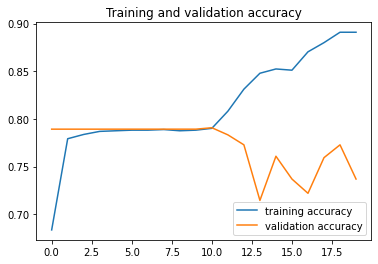

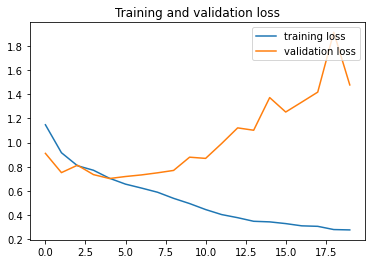

In [144]:
import matplotlib.pyplot as plt
accuracy      = training_history.history['accuracy']
val_accuracy  = training_history.history['val_accuracy']
loss     = training_history.history['loss']
val_loss = training_history.history['val_loss']

epochs   = range(len(accuracy)) # Get number of epochs

plt.plot  ( epochs, accuracy, label = 'training accuracy' )
plt.plot  ( epochs, val_accuracy, label = 'validation accuracy' )
plt.title ('Training and validation accuracy')
plt.legend(loc = 'lower right')
plt.figure()

plt.plot  ( epochs, loss, label = 'training loss' )
plt.plot  ( epochs, val_loss, label = 'validation loss' )
plt.legend(loc = 'upper right')
plt.title ('Training and validation loss'   )

## 6. Conclusion and Interpretation

The confusion matrix shows that the false positives and negatives are more for the ratings 1 to 4 and the least for rating 5, i.e. the prediction for rating 5 is the best. This was expected as the initial data was highly imbalanced with most of the ratings having value 5. 
Also the precision and recall values are the highest for rating 5 and lower for other ratings, which is a reconfirmation on the class imbalance problem highlighed earlier.
The accuracy scores for training and validation data show that the model is highly overfit, the same can be seen in the plots of training acc vs validation acc and training loss vs validation loss. To reduce the overfitting the model has to be fine tuned with various hyper parameters, or more data with enough ratings for all the values has to be fed, thereby reducing class imbalance and improve overall accuracy.

## 7. Food for thought:

1.) Change activation function (try leaky_relu or tanh) and see if it helps in improving model performance with the dataset that is highly imbalanced

2.) Try with only the overall review feature and see if it leads to improvement in model performace

3.) Change the hyperparameters of the model and compare the results 